# Cleaning and EDA

---

## Initial Steps - Imports, First Look, and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
raw_housing = pd.read_csv('../datasets/train.csv')

In [3]:
raw_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
def groupby_saleprice(feature):
    '''
    Quick check of the mean sale prices across the different categorical values in a given feature
    '''
    return raw_housing.groupby(feature).mean()[['SalePrice']]


# maybe a function that converts overall quality and condition to numerical values and combines them (maybe multiplication)

# quality/cond conversion dictionary
def qual_to_num(feature):
    qual_conversion = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0, np.nan: 0}
    
    house[feature] = house[feature].apply(lambda x: qual_conversion[x])
    
    
def vif_df(df):
    corr_features = df.columns
    vif_values = [variance_inflation_factor(df.values, i) for i in range(len(corr_features))]
    
    vif = pd.DataFrame(vif_values,
                   index = corr_features,
                   columns = ['vif']).sort_values(by = 'vif', ascending = False)
    
    return vif



In [5]:
# potential correlation
# land contour and land slope
# Year Built and Year Remod/Add

# medium interest in including
# land contour, Bldg Type, Mas Vnr Type

# not crazy about including
# land slope, Condition 1, Year Built, Bsmt Qual
# Wood Deck SF, Open Porch SF, Kitchen Qual
# Fireplaces, Fireplace Qu

# to combine
# Overall Qual and Overall Cond
# Exter Qual and Exter Cond
# Bsmt Qual and Bsmt Cond #
# Full Bath and Half Bath
# Fireplaces and Fireplace Qu
# 1*BsmtFin SF 1 + 0.5*Bsmt Unf SF

features = ['MS Zoning', 'Lot Area', 'Land Contour', 'Land Slope', 'Neighborhood', 'Condition 1',
            'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
           'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
           'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Kitchen Qual', 'Bedroom AbvGr',
           'Full Bath', 'Half Bath', 'Fireplaces', 'Fireplace Qu', 'BsmtFin SF 1', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF', 'SalePrice']

In [6]:
house = raw_housing[features].copy()
house.head()

,MS Zoning,Lot Area,Land Contour,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,...,Bedroom AbvGr,Full Bath,Half Bath,Fireplaces,Fireplace Qu,BsmtFin SF 1,Bsmt Unf SF,1st Flr SF,2nd Flr SF,SalePrice
0,RL,13517,Lvl,Gtl,Sawyer,RRAe,1Fam,2Story,6,8,...,3,2,1,0,NaN,533.0,192.0,725,754,130500
1,RL,11492,Lvl,Gtl,SawyerW,Norm,1Fam,2Story,7,5,...,4,2,1,1,TA,637.0,276.0,913,1209,220000
2,RL,7922,Lvl,Gtl,NAmes,Norm,1Fam,1Story,5,7,...,3,1,0,0,NaN,731.0,326.0,1057,0,109000
3,RL,9802,Lvl,Gtl,Timber,Norm,1Fam,2Story,5,5,...,3,2,1,0,NaN,0.0,384.0,744,700,174000
4,RL,14235,Lvl,Gtl,SawyerW,Norm,1Fam,1.5Fin,6,8,...,3,2,0,0,NaN,0.0,676.0,831,614,138500


In [7]:
house.columns = [col.lower().replace(' ','_').replace('/','_') for col in house.columns]

In [8]:
house.head()

,ms_zoning,lot_area,land_contour,land_slope,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,...,bedroom_abvgr,full_bath,half_bath,fireplaces,fireplace_qu,bsmtfin_sf_1,bsmt_unf_sf,1st_flr_sf,2nd_flr_sf,saleprice
0,RL,13517,Lvl,Gtl,Sawyer,RRAe,1Fam,2Story,6,8,...,3,2,1,0,NaN,533.0,192.0,725,754,130500
1,RL,11492,Lvl,Gtl,SawyerW,Norm,1Fam,2Story,7,5,...,4,2,1,1,TA,637.0,276.0,913,1209,220000
2,RL,7922,Lvl,Gtl,NAmes,Norm,1Fam,1Story,5,7,...,3,1,0,0,NaN,731.0,326.0,1057,0,109000
3,RL,9802,Lvl,Gtl,Timber,Norm,1Fam,2Story,5,5,...,3,2,1,0,NaN,0.0,384.0,744,700,174000
4,RL,14235,Lvl,Gtl,SawyerW,Norm,1Fam,1.5Fin,6,8,...,3,2,0,0,NaN,0.0,676.0,831,614,138500


---

## Dealing with Missing Values and Combining Columns

In [9]:
house.isnull().sum()

ms_zoning            0
lot_area             0
land_contour         0
land_slope           0
neighborhood         0
condition_1          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod_add       0
mas_vnr_type        22
exter_qual           0
exter_cond           0
bsmt_qual           55
bsmt_cond           55
garage_area          1
wood_deck_sf         0
open_porch_sf        0
kitchen_qual         0
bedroom_abvgr        0
full_bath            0
half_bath            0
fireplaces           0
fireplace_qu      1000
bsmtfin_sf_1         1
bsmt_unf_sf          1
1st_flr_sf           0
2nd_flr_sf           0
saleprice            0
dtype: int64

There is one row missing all the basement data. It may be fair to assume that the home is missing a basement and these values would all be zero.

In [10]:
null_basement_info = house[house['bsmtfin_sf_1'].isna()]
null_basement_info[['bsmt_qual', 'bsmt_cond', 'garage_area', 'bsmtfin_sf_1', 'bsmt_unf_sf']]

,bsmt_qual,bsmt_cond,garage_area,bsmtfin_sf_1,bsmt_unf_sf
1327,NaN,NaN,280.0,NaN,NaN


In [11]:
# turn missing basement square feet info into zeros
# basement quality and condition will be dealt with later
house.loc[house['bsmtfin_sf_1'].isna(), ['bsmtfin_sf_1', 'bsmt_unf_sf']] = 0

We only have one garage related column so it is more challenging to infer about the row with a missing `garage_area` value. It is likely fine to convert this singe row's `garage_area` value to zero also.

In [12]:
house.loc[house['garage_area'].isna(), 'garage_area'] = 0

Missing values in the basement columns appear to be homes without basements. We see the missing 55 entries in the same rows for `bsmt_qual` and `bsmt_cond`.

In [13]:
house.loc[house['bsmt_qual'].isnull(), 'bsmt_cond'].value_counts(dropna = False)

NaN    55
Name: bsmt_cond, dtype: int64

In [14]:
# converts descriptive rating to numerical
qual_to_num('bsmt_qual')
qual_to_num('bsmt_cond')

# combines basment quality and condition ratings via multiplication
house['bsmt_qual_cond'] = house['bsmt_qual'] * house['bsmt_cond']
house.drop(columns = ['bsmt_qual', 'bsmt_cond'], inplace = True)

We see the same issue arise with `fireplaces` and `fireplace_qu`. The homes with zero fireplaces are fittingly missing descriptions for the quality of their fireplace.

In [15]:
house.loc[house['fireplaces'] == 0, 'fireplace_qu'].value_counts(dropna = False)

NaN    1000
Name: fireplace_qu, dtype: int64

In [16]:
# converts descriptive rating to numerical
qual_to_num('fireplace_qu')

# combines fireplace count and quality rating via multiplication
house['fireplaces_weighted'] = house['fireplaces'] * house['fireplace_qu']
house.drop(columns = ['fireplaces', 'fireplace_qu'], inplace = True)

The only remaining column with missing entires is `mas_vnr_typ`. This is not something we can reasonably adjust, so we will leave these missing values in until they give us a reason to drop them or the column.

In [17]:
house.isnull().sum()

ms_zoning               0
lot_area                0
land_contour            0
land_slope              0
neighborhood            0
condition_1             0
bldg_type               0
house_style             0
overall_qual            0
overall_cond            0
year_built              0
year_remod_add          0
mas_vnr_type           22
exter_qual              0
exter_cond              0
garage_area             0
wood_deck_sf            0
open_porch_sf           0
kitchen_qual            0
bedroom_abvgr           0
full_bath               0
half_bath               0
bsmtfin_sf_1            0
bsmt_unf_sf             0
1st_flr_sf              0
2nd_flr_sf              0
saleprice               0
bsmt_qual_cond          0
fireplaces_weighted     0
dtype: int64

In [18]:
house['mas_vnr_type'].value_counts(dropna = False)

None       1218
BrkFace     630
Stone       168
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [19]:
# To edit
# features = ['MS Zoning', 'Lot Area', 'Land Contour', 'Land Slope', 'Neighborhood', 'Condition 1',
#            'Bldg Type', 'House Style', 'Year Built', 'Year Remod/Add',
#           'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
#           'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Kitchen Qual', 'Gr Liv Area', 'Bedroom AbvGr']

In [20]:
# adds square feet (SF) measurements with weights:
# 1*(Finished SF) + 0.5(Unfinished SF)
house['bsmt_weighted_sf'] = house['bsmtfin_sf_1'] + 0.5*house['bsmt_unf_sf']
house.drop(columns = ['bsmtfin_sf_1', 'bsmt_unf_sf'], inplace = True)

In [21]:
# combines overall quality and condition into one column via multiplication
house['qual_cond'] = house['overall_qual'] * house['overall_cond']
house.drop(columns = ['overall_qual', 'overall_cond'], inplace = True)

In [22]:
# converts descriptive rating to numerical
qual_to_num('exter_qual')
qual_to_num('exter_cond')

# combines exterior quality and condition into one column via multiplication
house['exter_qual_cond'] = house['exter_qual'] * house['exter_cond']
house.drop(columns = ['exter_qual', 'exter_cond'], inplace = True)

In [23]:
# combines full bath and half bath into one column
house['bath'] = house['full_bath'] + 0.5*house['half_bath']
house.drop(columns = ['full_bath', 'half_bath'], inplace = True)

In [24]:
# convert descriptive rating to numerical
qual_to_num('kitchen_qual')

In [25]:
house['sq_ft'] = house['1st_flr_sf'] + house['2nd_flr_sf']
house.drop(columns = ['1st_flr_sf', '2nd_flr_sf'], inplace = True)

In [26]:
# consider squaring kitchen qual to match how other ratings are qual * cond

---

## Removing Outliers and Exploratory Data Analysis

In [27]:
house.describe()

,lot_area,year_built,year_remod_add,garage_area,wood_deck_sf,open_porch_sf,kitchen_qual,bedroom_abvgr,saleprice,bsmt_qual_cond,fireplaces_weighted,bsmt_weighted_sf,qual_cond,exter_qual_cond,bath,sq_ft
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,10065.208191,1971.708922,1984.190151,473.440761,93.833740,47.556802,3.517309,2.843491,181469.701609,10.549000,2.033642,725.810580,33.866407,10.518284,1.762799,1493.817162
std,6742.488909,30.177889,21.036250,216.135102,128.549416,66.747241,0.665577,0.826618,79258.659352,3.061151,2.283203,406.466601,9.255859,2.195124,0.637775,497.618666
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,12789.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,334.000000
25%,7500.000000,1953.500000,1964.500000,319.000000,0.000000,0.000000,3.000000,2.000000,129825.000000,9.000000,0.000000,440.250000,30.000000,9.000000,1.000000,1124.500000
50%,9430.000000,1974.000000,1993.000000,480.000000,0.000000,27.000000,3.000000,3.000000,162500.000000,12.000000,1.000000,674.500000,35.000000,9.000000,2.000000,1440.000000
75%,11513.500000,2001.000000,2004.000000,576.000000,168.000000,70.000000,4.000000,3.000000,214000.000000,12.000000,4.000000,916.750000,40.000000,12.000000,2.500000,1728.000000
max,159000.000000,2010.000000,2010.000000,1418.000000,1424.000000,547.000000,5.000000,8.000000,611657.000000,20.000000,12.000000,5877.000000,90.000000,25.000000,5.000000,5642.000000


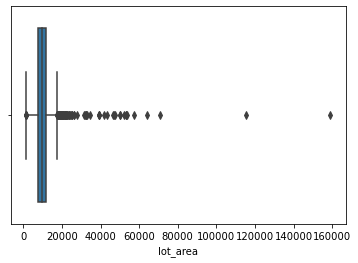

In [28]:
sns.boxplot(x = house['lot_area']);

In [31]:
perc_25 = house['lot_area'].quantile(0.25)
perc_75 = house['lot_area'].quantile(0.75)
large_lot = house[house['lot_area'] > perc_75]

In [32]:
large_lot

,ms_zoning,lot_area,land_contour,land_slope,neighborhood,condition_1,bldg_type,house_style,year_built,year_remod_add,...,kitchen_qual,bedroom_abvgr,saleprice,bsmt_qual_cond,fireplaces_weighted,bsmt_weighted_sf,qual_cond,exter_qual_cond,bath,sq_ft
0,RL,13517,Lvl,Gtl,Sawyer,RRAe,1Fam,2Story,1976,2005,...,4,3,130500,9,0,629.0,48,12,2.5,1479
4,RL,14235,Lvl,Gtl,SawyerW,Norm,1Fam,1.5Fin,1900,1993,...,3,3,138500,8,0,338.0,48,9,2.0,1445
5,RL,16492,Lvl,Gtl,NAmes,PosA,1Fam,1Story,1966,2002,...,4,2,190000,9,4,525.5,36,12,2.5,1888
7,RL,12160,Lvl,Gtl,NAmes,Norm,1Fam,1Story,1959,1959,...,3,3,142000,9,0,1094.0,25,9,1.0,1188
8,RL,15783,Lvl,Gtl,OldTown,Artery,1Fam,1Story,1952,1952,...,3,2,112500,9,0,608.0,25,9,1.0,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,RL,13350,Lvl,Gtl,Sawyer,Norm,1Fam,1Story,1974,1974,...,3,3,142500,9,2,813.0,25,9,1.0,894
2040,RL,15593,Lvl,Gtl,ClearCr,Norm,1Fam,1.5Fin,1953,1953,...,3,3,225000,9,3,953.5,28,12,2.0,2287
2041,RL,13688,Lvl,Gtl,NridgHt,Norm,1Fam,2Story,2003,2004,...,5,3,412500,15,8,1294.0,45,12,2.5,2668
2045,RL,12444,Lvl,Gtl,NridgHt,Norm,1Fam,1Story,2008,2008,...,5,2,394617,15,4,1634.0,40,15,2.0,1932


In [33]:
large_lot['lot_area'].value_counts(bins = 25).sort_index()

(11367.514, 17414.4]    424
(17414.4, 23313.8]       55
(23313.8, 29213.2]        9
(29213.2, 35112.6]        6
(35112.6, 41012.0]        3
(41012.0, 46911.4]        3
(46911.4, 52810.8]        5
(52810.8, 58710.2]        4
(58710.2, 64609.6]        1
(64609.6, 70509.0]        0
(70509.0, 76408.4]        1
(76408.4, 82307.8]        0
(82307.8, 88207.2]        0
(88207.2, 94106.6]        0
(94106.6, 100006.0]       0
(100006.0, 105905.4]      0
(105905.4, 111804.8]      0
(111804.8, 117704.2]      1
(117704.2, 123603.6]      0
(123603.6, 129503.0]      0
(129503.0, 135402.4]      0
(135402.4, 141301.8]      0
(141301.8, 147201.2]      0
(147201.2, 153100.6]      0
(153100.6, 159000.0]      1
Name: lot_area, dtype: int64

In [901]:
house.shape

(2051, 24)

We see that 75% of the homes in Ames contain less than 11,513 square feet of lot area. Within the upper quartile, 82% of the remaining homes still have less 17,414 square feet of area. We then see a significant drop off in number of homes containing more than 23,313.8 square feet of lot area. Let us trim off these outliers that make up less than 2% of the data.

In [35]:
house = house[house['lot_area'] <= 23313.8]

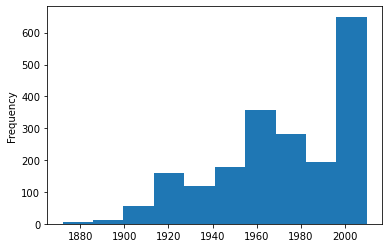

In [36]:
house['year_built'].plot.hist(bins = 10);

In [37]:
house['year_built'].value_counts(bins = 10).sort_index()

(1871.861, 1885.8]      6
(1885.8, 1899.6]       12
(1899.6, 1913.4]       56
(1913.4, 1927.2]      161
(1927.2, 1941.0]      138
(1941.0, 1954.8]      159
(1954.8, 1968.6]      358
(1968.6, 1982.4]      282
(1982.4, 1996.2]      195
(1996.2, 2010.0]      650
Name: year_built, dtype: int64

In [38]:
house.loc[house['year_built'] < 1900, ['year_built', 'saleprice']].sort_values(by = 'year_built')

,year_built,saleprice
951,1872,122000
136,1875,94000
1134,1879,185000
1939,1880,295000
784,1880,117500
394,1885,122500
1318,1890,159500
1204,1890,95000
918,1890,124900
501,1890,78500


In [39]:
house.loc[house['year_built'] < 1900, 'saleprice'].mean()

160591.0

In [40]:
house['saleprice'].mean()

180535.66336142787

It does not seem necessary to drop homes built especially long ago. These homes to not appear to have extraordinary sale prices.

In [41]:
house.describe()

,lot_area,year_built,year_remod_add,garage_area,wood_deck_sf,open_porch_sf,kitchen_qual,bedroom_abvgr,saleprice,bsmt_qual_cond,fireplaces_weighted,bsmt_weighted_sf,qual_cond,exter_qual_cond,bath,sq_ft
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,9469.236986,1971.818542,1984.235002,469.894398,92.634110,46.996529,3.515617,2.840357,180535.663361,10.553793,1.991076,717.810858,33.877045,10.515121,1.760040,1482.514626
std,3590.363046,30.241305,21.023331,213.398400,126.260462,65.392720,0.663593,0.822126,78316.495002,3.036028,2.244022,377.033187,9.208603,2.191681,0.634593,477.361202
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,2.000000,0.000000,12789.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,334.000000
25%,7476.000000,1953.000000,1965.000000,313.000000,0.000000,0.000000,3.000000,2.000000,129500.000000,9.000000,0.000000,440.000000,30.000000,9.000000,1.000000,1120.000000
50%,9350.000000,1975.000000,1993.000000,478.000000,0.000000,26.000000,3.000000,3.000000,161500.000000,12.000000,1.000000,672.000000,35.000000,9.000000,2.000000,1433.000000
75%,11361.000000,2001.000000,2004.000000,576.000000,168.000000,70.000000,4.000000,3.000000,213000.000000,12.000000,4.000000,911.000000,40.000000,12.000000,2.000000,1721.000000
max,22950.000000,2010.000000,2010.000000,1348.000000,1424.000000,547.000000,5.000000,8.000000,611657.000000,20.000000,12.000000,2319.000000,90.000000,25.000000,5.000000,3672.000000


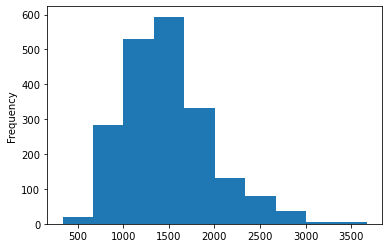

In [42]:
house['sq_ft'].plot.hist();

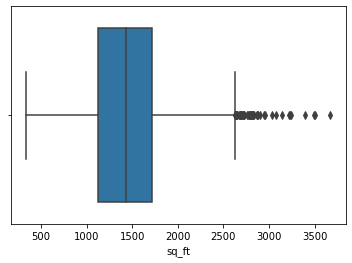

In [43]:
sns.boxplot(x = house['sq_ft']);

In [917]:
house['sq_ft'].value_counts(bins = 20).sort_index()

(330.661, 500.9]      5
(500.9, 667.8]       14
(667.8, 834.7]       60
(834.7, 1001.6]     223
(1001.6, 1168.5]    277
(1168.5, 1335.4]    254
(1335.4, 1502.3]    310
(1502.3, 1669.2]    284
(1669.2, 1836.1]    212
(1836.1, 2003.0]    120
(2003.0, 2169.9]     75
(2169.9, 2336.8]     57
(2336.8, 2503.7]     43
(2503.7, 2670.6]     36
(2670.6, 2837.5]     29
(2837.5, 3004.4]      8
(3004.4, 3171.3]      3
(3171.3, 3338.2]      3
(3338.2, 3505.1]      3
(3505.1, 3672.0]      1
Name: sq_ft, dtype: int64

In [44]:
house = house[house['sq_ft'] < 3340]

Nothing looks extraordinary here. There are quite a few outliers in the boxplot. They appear dense near the whiskers and smoothly decrease in density away from the whiskers, which does not seem atypical or necessary to eliminate.

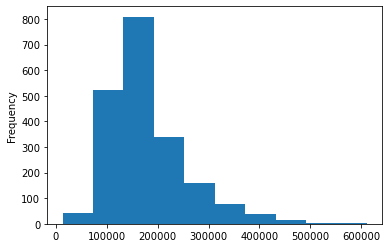

In [46]:
house['saleprice'].plot.hist();

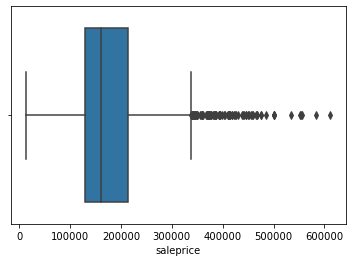

In [47]:
sns.boxplot(x = house['saleprice']);

Above, we see some points on the right of the boxplot that do appear disjoint from the rest of the data. Let us examine this a little more closely.

In [48]:
house['saleprice'].value_counts(bins = 20).sort_index()

(12190.131, 42732.4]      8
(42732.4, 72675.8]       34
(72675.8, 102619.2]     134
(102619.2, 132562.6]    387
(132562.6, 162506.0]    453
(162506.0, 192449.4]    356
(192449.4, 222392.8]    207
(222392.8, 252336.2]    132
(252336.2, 282279.6]    101
(282279.6, 312223.0]     60
(312223.0, 342166.4]     56
(342166.4, 372109.8]     23
(372109.8, 402053.2]     22
(402053.2, 431996.6]     15
(431996.6, 461940.0]     10
(461940.0, 491883.4]      6
(491883.4, 521826.8]      3
(521826.8, 551770.2]      1
(551770.2, 581713.6]      3
(581713.6, 611657.0]      2
Name: saleprice, dtype: int64

Let us remove the 6 entries from the two largest bins.

In [49]:
house = house[house['saleprice'] <= 551770.2]

In [50]:
house['bedroom_abvgr'].value_counts().sort_index()

0       4
1      74
2     534
3    1093
4     253
5      37
6      12
8       1
Name: bedroom_abvgr, dtype: int64

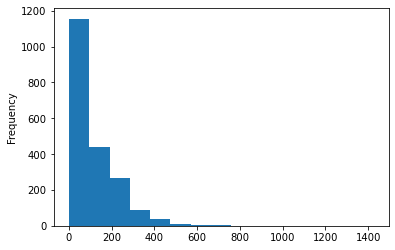

In [51]:
house['wood_deck_sf'].plot.hist(bins = 15);

In [52]:
house['wood_deck_sf'].value_counts(bins = 15).sort_index()

(-1.4249999999999998, 94.933]    1156
(94.933, 189.867]                 438
(189.867, 284.8]                  265
(284.8, 379.733]                   88
(379.733, 474.667]                 38
(474.667, 569.6]                   12
(569.6, 664.533]                    7
(664.533, 759.467]                  3
(759.467, 854.4]                    0
(854.4, 949.333]                    0
(949.333, 1044.267]                 0
(1044.267, 1139.2]                  0
(1139.2, 1234.133]                  0
(1234.133, 1329.067]                0
(1329.067, 1424.0]                  1
Name: wood_deck_sf, dtype: int64

There is one house with a wood deck roughly twice the size of the next largest deck size. Let us drop it.

In [53]:
house = house[house['wood_deck_sf'] < 1000]

In [54]:
house['open_porch_sf'].value_counts(bins = 15).sort_index()

(-0.548, 36.467]      1159
(36.467, 72.933]       371
(72.933, 109.4]        194
(109.4, 145.867]       120
(145.867, 182.333]      68
(182.333, 218.8]        41
(218.8, 255.267]        25
(255.267, 291.733]      12
(291.733, 328.2]         8
(328.2, 364.667]         2
(364.667, 401.133]       2
(401.133, 437.6]         1
(437.6, 474.067]         1
(474.067, 510.533]       1
(510.533, 547.0]         2
Name: open_porch_sf, dtype: int64

There are 5 homes with an open porch larger than 402 square feet. Let us drop these outliers.

In [55]:
house = house[house['open_porch_sf'] <= 402]

--- 

## Determining Which Numeric Features to Use

Let us begin by determining which numeric values are most relevant to `saleprice` and are not very correlated to one another.

In [56]:
house

,ms_zoning,lot_area,land_contour,land_slope,neighborhood,condition_1,bldg_type,house_style,year_built,year_remod_add,...,kitchen_qual,bedroom_abvgr,saleprice,bsmt_qual_cond,fireplaces_weighted,bsmt_weighted_sf,qual_cond,exter_qual_cond,bath,sq_ft
0,RL,13517,Lvl,Gtl,Sawyer,RRAe,1Fam,2Story,1976,2005,...,4,3,130500,9,0,629.0,48,12,2.5,1479
1,RL,11492,Lvl,Gtl,SawyerW,Norm,1Fam,2Story,1996,1997,...,4,4,220000,12,3,775.0,35,12,2.5,2122
2,RL,7922,Lvl,Gtl,NAmes,Norm,1Fam,1Story,1953,2007,...,4,3,109000,9,0,894.0,35,12,1.0,1057
3,RL,9802,Lvl,Gtl,Timber,Norm,1Fam,2Story,2006,2007,...,3,3,174000,12,0,192.0,25,9,2.5,1444
4,RL,14235,Lvl,Gtl,SawyerW,Norm,1Fam,1.5Fin,1900,1993,...,3,3,138500,8,0,338.0,48,9,2.0,1445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,11449,HLS,Gtl,Timber,Norm,1Fam,1Story,2007,2007,...,4,3,298751,12,4,1447.5,40,12,2.0,1728
2047,RL,12342,Lvl,Gtl,Edwards,Norm,1Fam,1Story,1940,1950,...,3,1,82500,9,0,561.5,20,9,1.0,861
2048,RL,7558,Bnk,Gtl,Crawfor,Norm,1Fam,1.5Fin,1928,1950,...,3,3,177000,9,3,448.0,36,9,1.5,1913
2049,RL,10400,Lvl,Gtl,NAmes,Norm,1Fam,1Story,1956,1956,...,3,3,144000,9,8,302.5,20,9,1.0,1200


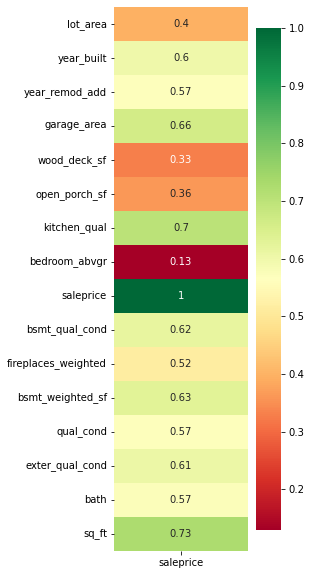

In [57]:
plt.figure(figsize = (3,10))
sns.heatmap(house.corr()[['saleprice']], cmap = 'RdYlGn', annot = True);

Out of the numeric features we have selected/created, three stand out as correlated to `saleprice`: `sq_ft`, `kitchen_qual`, and `garage_area`. It would be nice if we could use all of these features in our model, unfortunately, their variance inflation factors are quite large.

In [58]:
vif_df(house[['sq_ft', 'kitchen_qual', 'garage_area']])

,vif
kitchen_qual,15.746913
sq_ft,14.933578
garage_area,8.486028


In [61]:
vif_df(house[['sq_ft', 'kitchen_qual']])

,vif
sq_ft,13.41123
kitchen_qual,13.41123


In [62]:
vif_df(house[['sq_ft', 'garage_area']])

,vif
garage_area,7.227326
sq_ft,7.227326


In [63]:
vif_df(house[['kitchen_qual', 'garage_area']])

,vif
kitchen_qual,7.620952
garage_area,7.620952


Because each possible pair of the three features produce large VIF scores, we can only use one of these features. Let us use `sq_ft` since it has the highest correlation with `saleprice`.

In [65]:
numeric_cols = house.select_dtypes(include = 'number').columns

In [66]:
for col in numeric_cols:
    if col not in ['sq_ft', 'kitche_qual', 'garage_area']:
        print(vif_df(house[['sq_ft', col]]))

               vif
sq_ft     7.699412
lot_area  7.699412
                  vif
sq_ft       11.380339
year_built  11.380339
                      vif
sq_ft           11.323346
year_remod_add  11.323346
                 vif
sq_ft         1.6834
wood_deck_sf  1.6834
                    vif
sq_ft          1.723933
open_porch_sf  1.723933
                   vif
sq_ft         13.41123
kitchen_qual  13.41123
                     vif
sq_ft          12.668996
bedroom_abvgr  12.668996
                 vif
sq_ft      14.210332
saleprice  14.210332
                     vif
sq_ft           9.442448
bsmt_qual_cond  9.442448
                          vif
fireplaces_weighted  2.193622
sq_ft                2.193622
                       vif
sq_ft             4.870735
bsmt_weighted_sf  4.870735
                 vif
sq_ft      10.518976
qual_cond  10.518976
                       vif
sq_ft            11.739249
exter_qual_cond  11.739249
             vif
sq_ft  17.198704
bath   17.198704


The only features which produce VIFs below 5 when paired with `sq_ft` are:
- `wood_deck_sf`
- `open_porch_sf`
- `fireplaces_weighted`
- `bsmt_weighted_sf`

Although wood decks and open porches surely add value to properties, I highly doubt they are the strongest indicators for home price. Moreover, many homes simply do not have these (47.5% own a wood deck and 55.3% own an open porch). **These may be worth including in a Lasso or Ridge regression**.

In [67]:
print( (house['wood_deck_sf'] != 0).sum()/len(house) )
print( (house['open_porch_sf'] != 0).sum()/len(house) )

0.474025974025974
0.5529470529470529


Of the two left, `bsmt_weighted_sf` has a stronger correlation to `saleprice`. It produces a little higher VIF than I would like to have since I am still looking to add more columns, but our primary goal is prediction instead of inference, so slightly high VIF is not too problematic.

In [68]:
# may even be worth including all 3
vif_df(house[['sq_ft', 'bsmt_weighted_sf', 'fireplaces_weighted']])

,vif
sq_ft,5.522034
bsmt_weighted_sf,4.982449
fireplaces_weighted,2.243934


In [69]:
numeric_features = ['sq_ft', 'bsmt_weighted_sf']

In [626]:
### revise below

In [627]:
# seems early to define x

# learned about method from https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
#X = house.select_dtypes(include = ['int64', 'float64']).copy()
#y = house['saleprice']

In [628]:
#X.drop(columns = ['kitchen_qual', 'garage_area', 'saleprice'], inplace = True)

In [629]:
#gr_liv_area,
# lot_area, bsmt_weighted_sf
#vif_df(X[['gr_liv_area', 'lot_area']])

---

## Determining Which Categorical Features to Use

In [70]:
categoric = house.select_dtypes(include = ['object'])

In [71]:
categoric

,ms_zoning,land_contour,land_slope,neighborhood,condition_1,bldg_type,house_style,mas_vnr_type
0,RL,Lvl,Gtl,Sawyer,RRAe,1Fam,2Story,BrkFace
1,RL,Lvl,Gtl,SawyerW,Norm,1Fam,2Story,BrkFace
2,RL,Lvl,Gtl,NAmes,Norm,1Fam,1Story,None
3,RL,Lvl,Gtl,Timber,Norm,1Fam,2Story,None
4,RL,Lvl,Gtl,SawyerW,Norm,1Fam,1.5Fin,None
...,...,...,...,...,...,...,...,...
2046,RL,HLS,Gtl,Timber,Norm,1Fam,1Story,None
2047,RL,Lvl,Gtl,Edwards,Norm,1Fam,1Story,None
2048,RL,Bnk,Gtl,Crawfor,Norm,1Fam,1.5Fin,None
2049,RL,Lvl,Gtl,NAmes,Norm,1Fam,1Story,None


In [72]:
for col in categoric.columns:
    print(categoric[col].value_counts(dropna = False))

RL         1556
RM          312
FV          101
C (all)      17
RH           14
A (agr)       1
I (all)       1
Name: ms_zoning, dtype: int64
Lvl    1815
HLS      81
Bnk      75
Low      31
Name: land_contour, dtype: int64
Gtl    1919
Mod      78
Sev       5
Name: land_slope, dtype: int64
NAmes      307
CollgCr    180
OldTown    159
Edwards    139
Somerst    130
NridgHt    118
Gilbert    113
Sawyer     109
NWAmes      87
SawyerW     86
BrkSide     76
Mitchel     75
Crawfor     69
IDOTRR      67
NoRidge     46
Timber      46
StoneBr     34
SWISU       32
MeadowV     24
Blmngtn     22
ClearCr     20
BrDale      19
NPkVill     17
Veenker     15
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64
Norm      1727
Feedr      106
Artery      67
RRAn        35
PosN        26
RRAe        21
PosA        11
RRNn         6
RRNe         3
Name: condition_1, dtype: int64
1Fam      1655
TwnhsE     161
Duplex      74
Twnhs       69
2fmCon      43
Name: bldg_type

We saw earlier that despite wanting to include many numeric columns, most of them were correlated to one another and we could really only use two. In the same spirit avoiding multicollinearity among the nurmic variables, let us be picky about which categorical features we decide to use in our model.

`neighborhood` immediately stands out as an indicator of property value. Almost all the other categorical variables have more than 1500 appearances of a single category (out of 2051). This leads me to believe these features will not do a great job at separating out the values of the different homes. Besides `neighborhood`, only `house_style` and `mas_vnr_type` have more spread out values. Since `mas_vnr_type` does not stand out to me as influencing the value of a home that much, I will only use `neighborhood` and `house_style` for the categorical features in our model.

\* In a future model, I will include `mas_vnr_type` to see if my intuition was correct.\*

In [73]:
categ_features = ['neighborhood', 'house_style']

In [ ]:
# possibly keeping
# neighborhood, house_style - possibly correlated with gr_liv_area

# mid level interest
# mas_vnr_type

# likely not keeping
# ms_zoning, land_contour, land_slope,

---

## Making Sure Dummy Columns Agree Between Train and Test

In [74]:
house_predictors = house[numeric_features + categ_features]

In [75]:
raw_house_test = pd.read_csv('../datasets/test.csv')

In [76]:
# index [:-1] to exclude saleprice from features
# since it doesn't appear in test data
house_test = raw_house_test[features[:-1]].copy()

house_test.isnull().sum()

MS Zoning           0
Lot Area            0
Land Contour        0
Land Slope          0
Neighborhood        0
Condition 1         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Mas Vnr Type        1
Exter Qual          0
Exter Cond          0
Bsmt Qual          25
Bsmt Cond          25
Garage Area         0
Wood Deck SF        0
Open Porch SF       0
Kitchen Qual        0
Bedroom AbvGr       0
Full Bath           0
Half Bath           0
Fireplaces          0
Fireplace Qu      422
BsmtFin SF 1        0
Bsmt Unf SF         0
1st Flr SF          0
2nd Flr SF          0
dtype: int64

Since the columns we chose for our model do not overlap with the columns containing missing data, we do not need to fill in these missing values. All that we need to do is make sure the column names are in the same format as our train data and that we **feature engineer `bsmt_weighted_sf` into the test dataset**.

In [77]:
house_test.columns = [col.lower().replace(' ','_').replace('/','_') for col in house_test.columns]

In [80]:
# adds square feet (SF) measurements with weights:
# 1*(Finished SF) + 0.5(Unfinished SF)
house_test['bsmt_weighted_sf'] = house_test['bsmtfin_sf_1'] + 0.5*house_test['bsmt_unf_sf']
house_test.drop(columns = ['bsmtfin_sf_1', 'bsmt_unf_sf'], inplace = True)

KeyError: 'bsmtfin_sf_1'

In [81]:
house_test['sq_ft'] = house_test['1st_flr_sf'] + house_test['2nd_flr_sf']
house_test.drop(columns = ['1st_flr_sf', '2nd_flr_sf'], inplace = True)

In [82]:
house_test = house_test[numeric_features + categ_features]

In [83]:
# Train and test may have different appearance of categorical values
# dummy columns might not agree and will interfere with running model
# on test data

# dummify
train_with_dummies = pd.get_dummies(house_predictors, columns = categ_features, drop_first = True)
test_with_dummies = pd.get_dummies(house_test, columns = categ_features, drop_first = True)

In [84]:
# check column counts pre changes
print(train_with_dummies.shape)
print(test_with_dummies.shape)

(2002, 36)
(878, 34)


In [85]:
# save dummy column names from both train and test to a set
both_columns_set = set(train_with_dummies.columns).union(set(test_with_dummies.columns))

# for any column names not in set add column with 0s
for col in both_columns_set:
    if col not in train_with_dummies.columns:
        train_with_dummies[col] = 0
    if col not in test_with_dummies.columns:
        test_with_dummies[col] = 0

# arrange columns so they agree

In [86]:
# check column counts pre changes
print(train_with_dummies.shape)
print(test_with_dummies.shape)

(2002, 36)
(878, 36)


In [87]:
train_with_dummies.sum()

sq_ft                   2952734.0
bsmt_weighted_sf        1431221.5
neighborhood_Blueste          6.0
neighborhood_BrDale          19.0
neighborhood_BrkSide         76.0
neighborhood_ClearCr         20.0
neighborhood_CollgCr        180.0
neighborhood_Crawfor         69.0
neighborhood_Edwards        139.0
neighborhood_Gilbert        113.0
neighborhood_Greens           3.0
neighborhood_GrnHill          2.0
neighborhood_IDOTRR          67.0
neighborhood_Landmrk          1.0
neighborhood_MeadowV         24.0
neighborhood_Mitchel         75.0
neighborhood_NAmes          307.0
neighborhood_NPkVill         17.0
neighborhood_NWAmes          87.0
neighborhood_NoRidge         46.0
neighborhood_NridgHt        118.0
neighborhood_OldTown        159.0
neighborhood_SWISU           32.0
neighborhood_Sawyer         109.0
neighborhood_SawyerW         86.0
neighborhood_Somerst        130.0
neighborhood_StoneBr         34.0
neighborhood_Timber          46.0
neighborhood_Veenker         15.0
house_style_1.

In [88]:
test_with_dummies.sum()

sq_ft                   1311895.0
bsmt_weighted_sf         624165.5
neighborhood_Blueste          4.0
neighborhood_BrDale          11.0
neighborhood_BrkSide         32.0
neighborhood_ClearCr         17.0
neighborhood_CollgCr         87.0
neighborhood_Crawfor         32.0
neighborhood_Edwards         50.0
neighborhood_Gilbert         49.0
neighborhood_Greens           5.0
neighborhood_IDOTRR          24.0
neighborhood_MeadowV         13.0
neighborhood_Mitchel         32.0
neighborhood_NAmes          133.0
neighborhood_NPkVill          6.0
neighborhood_NWAmes          44.0
neighborhood_NoRidge         23.0
neighborhood_NridgHt         44.0
neighborhood_OldTown         76.0
neighborhood_SWISU           16.0
neighborhood_Sawyer          40.0
neighborhood_SawyerW         38.0
neighborhood_Somerst         52.0
neighborhood_StoneBr         13.0
neighborhood_Timber          24.0
neighborhood_Veenker          7.0
house_style_1.5Unf            7.0
house_style_1Story          422.0
house_style_2.

It appears that our code above did not change any of the data and only added two columns full of zeros to the test data. Success!

Lastly, we will want to arrange our columns so that the model we will eventually build takes the linear combination of the variables in the appropriate order for both the train and test data sets.

In [89]:
column_order = train_with_dummies.columns
test_with_dummies = test_with_dummies[column_order]

As a sanity check, we see if the two columns are identical term-by-term.

In [90]:
train_with_dummies.columns == test_with_dummies.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# maybe rearrange/edit check

---

## Train-Test-Split and Building the Linear Regression

In [91]:
X = train_with_dummies
y = house['saleprice']

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [93]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [96]:
lr.score(X_train_sc, y_train)

0.8305166248932667

In [97]:
lr.score(X_val_sc, y_val)

0.8234789724626479

In [98]:
y_pred = lr.predict(X_val_sc)
metrics.mean_squared_error(y_val, y_pred)

951242461.293546

In [99]:
metrics.mean_squared_error(y_val, y_pred, squared = False)

30842.218812749936

In [100]:
#cross val score
cross_val_score(lr, X_train, y_train)

array([0.85375816, 0.86110121, 0.78445253, 0.75917635, 0.82608615])

In [790]:
# test_with_dummies was test data modified so model could be applied
# renaming for readability
X_test = test_with_dummies
X_test_sc = ss.transform(X_test)

In [791]:
kag_preds = lr.predict(X_test_sc)

After running the model on the test data and submitting it to Kaggle, the RMSE came out to be 35,257.3 which is significantly higher than RMSE we obtained from our validation set. This suggests that the model is overfit/has high variance.

---

## Take Two (Really Three...)

Although it is not illustrated above, the linear model I created was my second attempt. In my first attempt, I used the features `gr_liv_area`, `lot_area`, `neighborhood`, and `house_style` because `lot_area` had a low VIF score when paired with `gr_liv_area`. I ran into an issue where roughly 1/3 of the time my R squared scores were abyssmal, leading me to believe I had some outliers in the dataset still. I went back and removed some outliers which led to `lot_area` having larger VIF score this time and in the iteration above I included `bsmt_weighted_sf` instead of `lot_area`. This gave me an improvement from an initial RMSE score of 38,000.

Nina brought to my attention that the `gr_liv_area` is not the total above ground living area. So I will 

In [794]:
# Now I am curious what will happen to my model's performance if I am a little more lax on my choice of features. Earlier we made decisions to leave out some features because they contributed to large VIFs (`garage_area`) or they seemed like they only applied to a significantly smaller subset of the data (``)

---

## Exploring Why the Validation Score is So Low 1/3 of The Time

---

## Running Our Model on the Test CSV File!

In [792]:
kag_sub = {'Id': raw_house_test['Id'], 'SalePrice': kag_preds}
kag_sub = pd.DataFrame(kag_sub)

In [793]:
kag_sub.to_csv('../datasets/submission3_john.csv', index = False)

In [ ]:
# create some variable with scores and submission results - notes on what you did
# to keep track of what you did and how it performed

## To Check On Other Attempts

Check msn_vnr_type to see if intuition was correct.

One-hot encode kitchen quality (or ordinal encode)

Try kitchen rating with 0-5 values even with correlation

need to use ridge/lasso - for overfit data. try with slightly more numeric columns than you'd want
- overfit with open porch sf, wood_deck_sf, and possibly bsmt_sf

try including some features despite high vif
- prediction not inference
